In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# part = pd.read_csv('C:/Users/ParkHyosung/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/anomaly_reduction1.csv')
part = pd.read_csv('C:/Users/hyo/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/csv/Mixed_full.csv') # ParkHyosung
df = pd.DataFrame(data = part)

In [3]:
X = df.drop('Label', axis=1)
y = df['Label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
pipe = Pipeline([('pca', PCA()), ('clf', RandomForestClassifier(n_estimators = 3, max_depth = 2, max_features='sqrt'))]) # random_state=0, class_weight='balanced'

param_grid = {'pca__n_components': [5, 7, 10, 13, 18]}

In [7]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5) #, error_score='raise'
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf',
                                        RandomForestClassifier(max_depth=2,
                                                               n_estimators=3))]),
             param_grid={'pca__n_components': [5, 7, 10, 13, 18]})

In [8]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
result = grid_search.cv_results_
print(result.keys())
print()
print(grid_search.cv_results_['mean_test_score'])

Best parameters:  {'pca__n_components': 13}
Best cross-validation score: 0.94
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

[0.92368571 0.91564286 0.92091429 0.93624286 0.93461429]


In [9]:
best_model = grid_search.best_estimator_
pred_rf = best_model.predict(X_test_std)

In [10]:
acc = accuracy_score(y_test, pred_rf)
print("Accuracy:", acc)

Accuracy: 0.9278


In [11]:
conf_matrix = confusion_matrix(y_test, pred_rf)
conf_matrix

array([[12902,  2096],
       [   70, 14932]], dtype=int64)

In [12]:
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     14998
           1       0.88      1.00      0.93     15002

    accuracy                           0.93     30000
   macro avg       0.94      0.93      0.93     30000
weighted avg       0.94      0.93      0.93     30000



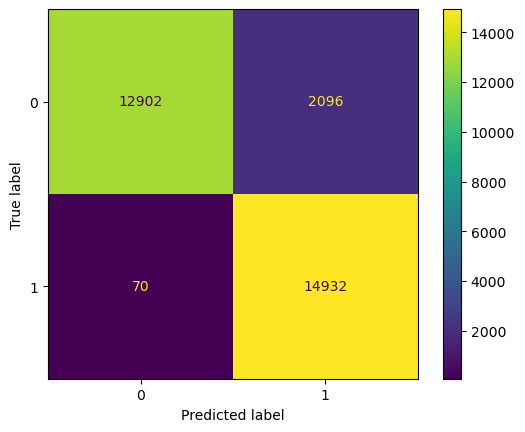

In [13]:
disp = ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [14]:
print(f"원본 데이터의 차원: {X_test.shape}")
X_test_transformed = best_model.named_steps['pca'].transform(X_test_std)
print(f"PCA를 거친 데이터의 차원: {X_test_transformed.shape}")

#  best_model.named_steps['pca'].transform(X_train_std)를 호출하면 학습된 PCA 변환을 X_train_std에 적용하고 차원이 축소된 변환된 데이터를 반환

원본 데이터의 차원: (30000, 72)
PCA를 거친 데이터의 차원: (30000, 13)


In [15]:
# tf_df = pd.DataFrame(X_test_transformed)
# print(tf_df.to_string(index = False))